# 2. Disease prediction

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.0 EDA uppvärmning

In [15]:
df = pd.read_csv("../Labb/Disease_prediction/cardio_train.csv", sep=";")

df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [16]:
# since age column in days, we convert it to years and then back to int

df["age"] = round(df["age"]/365).astype(int) 

df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


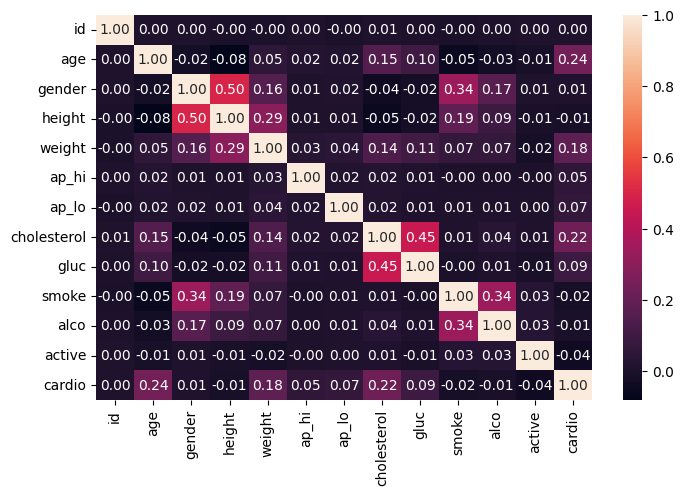

In [33]:
corr = df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [ ]:
# find higest and lowest correlation outside of the diagonal

corr = corr.abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
corr = corr[corr["level_0"] != corr["level_1"]]
corr.columns = ["feature1", "feature2", "corr"]

In [59]:
# remove all rows with dupplicate correlation values

corr = corr.drop_duplicates(subset=["corr"], keep="first")



In [70]:
corr.sort_values("corr", ascending=False)
corr = corr.reset_index(drop=True)
corr

,feature1,feature2,corr
0,height,gender,0.499033
1,cholesterol,gluc,0.451578
2,alco,smoke,0.340094
3,gender,smoke,0.338135
4,height,weight,0.290968
...,...,...,...
73,id,weight,0.001830
74,ap_hi,alco,0.001408
75,alco,id,0.001210
76,smoke,ap_hi,0.000922
